# Fällungstitration von Cl-, Br- und I- nebeneinander mit Ag+

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import stats
from scipy import constants as cnst
import numpy as np
import pandas as pd
import glob
import math
from IPython.display import HTML

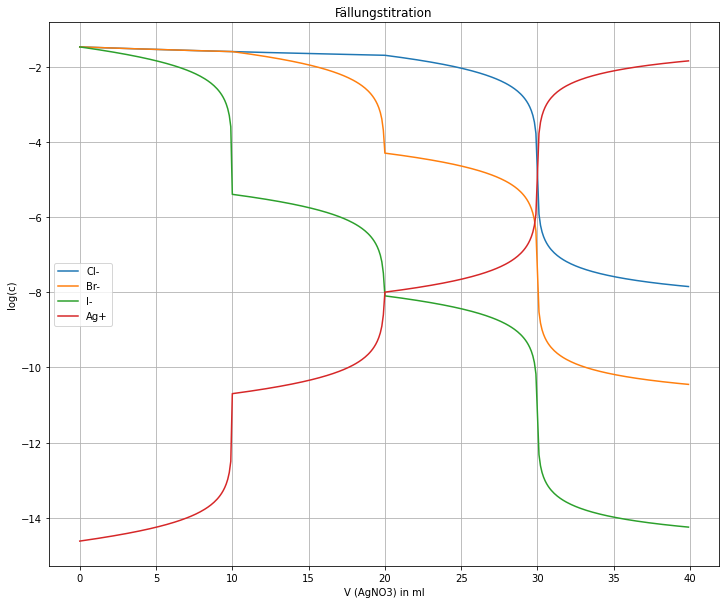

In [3]:
# Loeslichkeitsprodukte
lp_I = np.longdouble(8e-17)
lp_Br = np.longdouble(5e-13)
lp_Cl = np.longdouble(2e-10)

# Konzentration Faellungsmittel (AgNO3)
cf = 0.1

# Konzentrationen und Volumina von KI, KBr und KCl
c_I = 0.1
v_I = 0.01
c_Br = 0.1
v_Br = 0.01
c_Cl = 0.1
v_Cl = 0.01

# Startvolumen
v_start = v_I+v_Br+v_Cl

# Startwert Ag+
c_Ag = 1e-3

# Volumenänderung im Titrationsverlauf
l_v = np.arange(0.0,0.04,0.0001)
l_Cl = []
l_Br = []
l_I = []
l_Ag = []

for v in l_v:
    #Iteration
    while True:
        # Stoffmenge K+
        c_K = c_I*v_I/(v_start+v) + c_Br*v_Br/(v_start+v) + c_Cl*v_Cl/(v_start+v)
    
        # Stoffmenge Nitrat
        c_nit = cf*v/(v_start+v)
    
        # Stoffmengen I-, Br-, Cl-
        n_I = c_I*v_I/(v_start+v)
        # Löslichkeitsprodukt überschritten?
        if(c_Ag*n_I > lp_I):
            n_I = lp_I/c_Ag
        n_Br = c_Br*v_Br/(v_start+v)
        # Löslichkeitsprodukt überschritten?
        if(c_Ag*n_Br > lp_Br):
            n_Br = lp_Br/c_Ag
        n_Cl = c_Cl*v_Cl/(v_start+v)
        # Löslichkeitsprodukt überschritten?
        if(c_Ag*n_Cl > lp_Cl):
            n_Cl = lp_Cl/c_Ag
            
        # Summe Kationen
        sum_Kat = c_K + c_Ag
        # Summe Anionen
        sum_An = n_I+n_Br+n_Cl+c_nit
        # Iterationsbedingung
        if(abs(sum_An/sum_Kat - 1) < 1e-8):
            l_Ag.append(math.log10(c_Ag))
            l_I.append(math.log10(n_I))
            l_Br.append(math.log10(n_Br))
            l_Cl.append(math.log10(n_Cl))
            break
        # Anpassen Ag
        c_Ag = c_Ag * (sum_An/sum_Kat)**2
        
# Darstellung der Daten
x = l_v*1000
fig = plt.figure(figsize=(12, 10)) 
plt.minorticks_on
plt.grid(True,which='both')
plt.xlabel('V (AgNO3) in ml')
plt.ylabel('log(c)')
plt.title('Fällungstitration')
plt.plot(x,l_Cl,x,l_Br,x,l_I,x,l_Ag)
plt.legend(['Cl-','Br-','I-','Ag+'])
plt.show()
fig.savefig('test.png')

# Daten in Tabellenform
df_V = pd.DataFrame(data=x, columns=['Volumen in ml'])
df_Ag = pd.DataFrame(data=l_Ag,columns=['lg c(Ag)'])
df_Cl = pd.DataFrame(data=l_Cl,columns=['lg c(Cl)'])
df_Br = pd.DataFrame(data=l_Br,columns=['lg c(Br)'])
df_I = pd.DataFrame(data=l_I,columns=['lg c(I)'])
df = pd.concat([df_V,df_Ag,df_Cl,df_Br,df_I],axis=1)
#display(HTML(df.round(2).to_html(index=True)))
df.to_csv('Test.csv')